In [1]:
%config IPCompleter.greedy=True #enable intellisense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
keras.__version__

'2.4.3'

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

The data will be loaded as four arrays

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

The Fashoin_mnist dataset contains 60000 28*28 grayscale images of 10 fashion cagtegories, along with a test set of 10k images. It could be used as a drop-in replacement for the MNIST. we need to label 10 cagtegories from shirts, jeans, boots, etc..

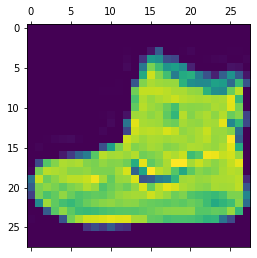

In [10]:
plt.matshow(x_train[0]) # discovering the images

In [11]:
y_train[0] #label number

9

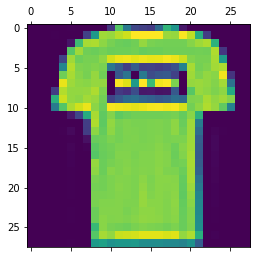

In [13]:
plt.matshow(x_train[1]) # discovering the images

In [14]:
y_train[1] #label number

0

In [15]:
#normalize dataset in the range from 0 to 1
# the actual pixel values are from 0 to 255, so we can divide by 255

x_train = x_train/255
x_test = x_test/255

In [16]:
x_train #we will see values between zero and 1

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### building the NN model using keras.
I will build the Sequential model from the keras doc

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten #i used the Flatten layer to convert 2D arrays into 1D , Dense layer is the hidden layer, and activation refers to the Activation function i will use

In [18]:
#model creation
model = Sequential()

In [19]:
#adding first layer: data of images
model.add(Flatten(input_shape = [28,28])) #28*28 = 784, so 784 neurons in the input layer

In [20]:
# adding second layer, which is the hidden layer
# we do trail and error. starting with 20 neurons using sigmoid
model.add(Dense(20,activation = 'sigmoid')) #i use sigmoid, we can use any activation function by writing its name such as relu or softmax etc..

In [21]:
# adding output layer
# we should take 10 nuerons because there are 10 labels in the data.
model.add(Dense(10,activation= 'softmax')) # softmax in here distributing into different classes

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [23]:
#compiling the model
# in the compiler we want to specify which loss, optimizer and metric we want to use for the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [24]:
#train the model
model.fit(x_train,y_train) #the train will be on 1 epoch as it is the defult value

1875/1875 [==============================] - 3s 1ms/step - loss: 1.0863 - accuracy: 0.6845


In [25]:
model.fit(x_train,y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4537 - accuracy: 0.8433
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4042 - accuracy: 0.8576
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3808 - accuracy: 0.8648
Epoch 4/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3649 - accuracy: 0.8692


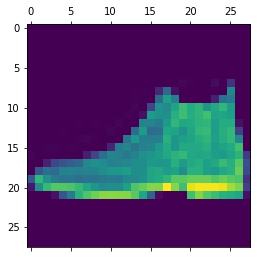

In [26]:
#testing
plt.matshow(x_test[0])

In [27]:
#prediction
predictor = model.predict(x_test)

In [28]:
predictor[0]

array([2.0207449e-04, 2.2221506e-05, 1.3388586e-04, 4.7243270e-04,
       1.0166759e-04, 5.6719668e-02, 1.1324919e-03, 8.9632377e-02,
       1.9605325e-03, 8.4962261e-01], dtype=float32)

In [30]:
np.argmax(predictor[0])

9

In [31]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.4110 - accuracy: 0.8518


[0.4109898507595062, 0.8518000245094299]